# ACML Assignment 1 - Linear Regression Model 
## Brenton Budler -  1827655

This implementation of the Linear Regression Model will be carried out on a dataset from an E-commerce company based in New York City that sells clothing online and also have in-store style and clothing advice sessions. The data set contains each custoemrs email address, home address and the color of their avatar. It also contains the following numerical columns: 
* Avg. Session Length: Average session length of in-store style advice sessions (in minutes)
* Time on App: Average time spent on App (in minutes)
* Time on Website: Average time spent on Website (in minutes)
* Length of Membership: How long the customer has been a member (in years)
* Yearly Amount Spent: The amount of money the customer spends in a year.

In [74]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Import the data
The first step in the process is to import the necessary data.

In [75]:
raw_data = pd.read_csv('Ecom.csv')
raw_data.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

## 2. Exploratory Data Analysis 

For the simple linear regression, we are looking for two varaibles in our data that are linearly correlated.

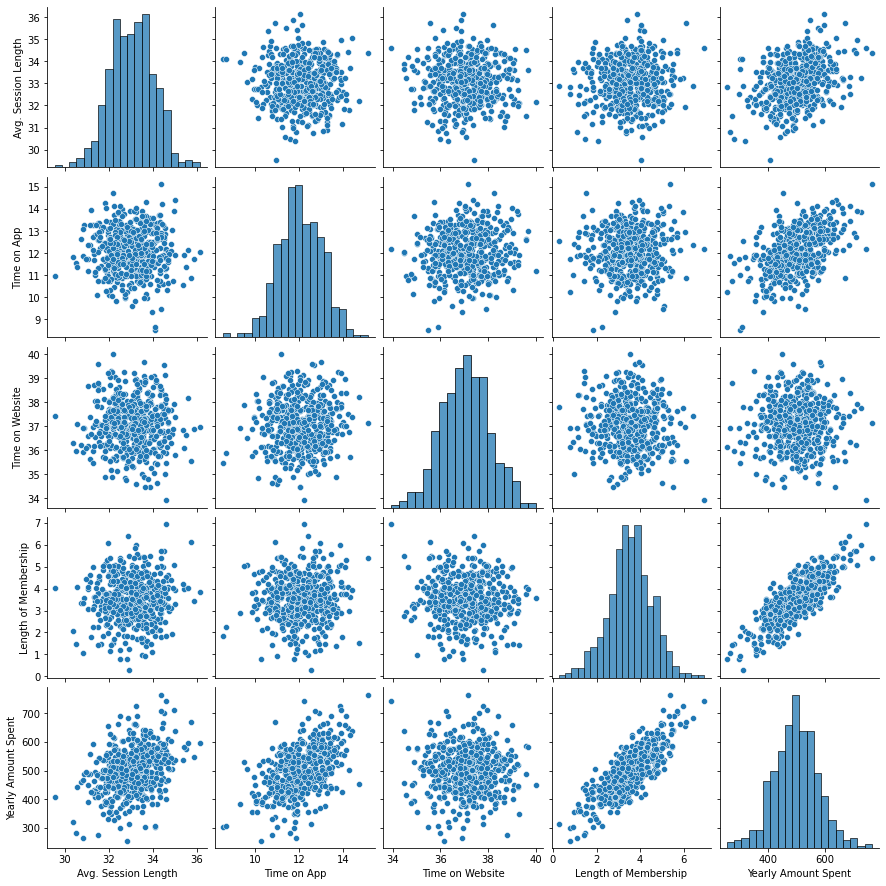

In [76]:
sns.pairplot(raw_data)
plt.show()

As we can see "Length of Membership" and "Yearly Amount Spent" seem to have a positive linear correlation, let's explore this relationship further:

In [77]:
data = pd.DataFrame()
data['memb_len'] = raw_data['Length of Membership']
data['yr_spend'] = raw_data['Yearly Amount Spent']
data.head()

memb_len    yr_spend
0  4.082621  587.951054
1  2.664034  392.204933
2  4.104543  487.547505
3  3.120179  581.852344
4  4.446308  599.406092

Text(0, 0.5, 'Yearly Amount Spent')

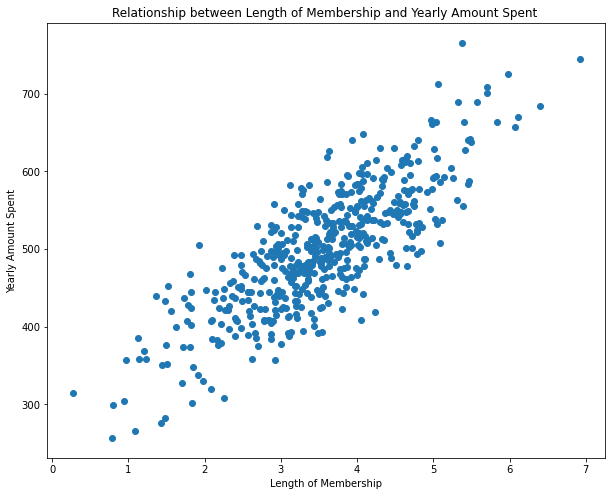

In [78]:
plt.figure(figsize=(10,8))
plt.scatter(x='memb_len', y = 'yr_spend', data = data)
plt.title("Relationship between Length of Membership and Yearly Amount Spent ")
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')

Due to their positivly correlated linear relationship these two variables will work well for fitting a simple linear regression.

## 3. Training and Testing Data

Now that we have explored the data a bit we can split our data into the data that will be used to train the model and the data that will be used to test it at a later stage.

In [101]:
from sklearn.model_selection import train_test_split

X = data['memb_len']
y = data['yr_spend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 4. Building the Model 

First we will have to create the hypothesis function for the simple linear regression: $h_\theta = \theta_o + \theta_1x$

In [102]:
def hyp_func(theta0, theta1, x1):
    return theta0 + theta1*x1

Next we create the cost function $J(\theta_0,\theta_1) = \frac{1}{2n} \displaystyle \sum _{i=1} ^{n} (h_\theta x^{(i)} - y^{(i)})^2$

In [103]:
def cost_func(theta0,theta1, x=X_train, y=y_train):
    n = len(x)
    total = sum(np.square(hyp_func(theta0=theta0, theta1=theta1, x1=x)-y))
    return (0.5*n)*total 

Next we create a function that will be used to update each $\theta$ value during the gradient descent using $\theta_j := \theta_j - \alpha \frac{\partial }{\partial \theta_j} J(\theta_0,\theta_1)$. The parametetrs 'reg' and 'lam' are used later when implementing regularization.

In [104]:
def update_vals(curr_theta0,curr_theta1,x,y, learning_rate, reg= False, lam =0):
    n = len(x)
    
    if not reg:
        temp_theta0  = curr_theta0 - (learning_rate * ((1/n)*sum(hyp_func(curr_theta0,curr_theta1,x)-y)))
        temp_theta1 = curr_theta1 - (learning_rate * ((1/n)*sum((hyp_func(curr_theta0,curr_theta1,x)-y)*x)))
    else:
        temp_theta0  = curr_theta0 - (learning_rate * ((1/n)*sum(hyp_func(curr_theta0,curr_theta1,x)-y)))
        temp_theta1 = curr_theta1(1-learning_rate*(lam/n)) - (learning_rate * ((1/n)*sum((hyp_func(curr_theta0,curr_theta1,x)-y)*x)))
   
    return [temp_theta0, temp_theta1]

With these helper functions in-place we can begin to construct the linear regression model.

In [114]:
def linear_regression(X,Y,learning_rate,iterations, results=False , graph=False):
    theta0 = 0 #Stores the current value of theta0 
    theta1 = 0 #Stores the current value of theta 1 
    iter_num = 0 #Stores the current iteration number
    
    t0s = [] #Stores the different values of theta0 
    t1s = [] #Stores the different values of theta1 
    costs = [] #Stores the associated cost for each pair of theta0 and theta1 
    iter_numbers = [] #Stores the different iteration numbers 
    
    for i in range(0,iterations):
        
        #Keeping track of the current values 
        t0s.append(theta0)
        t1s.append(theta1)
        costs.append(cost_func(theta0,theta1,X,Y))
        iter_numbers.append(iter_num)
        
        #Adjusting the values using the functions outlined above 
        theta0, theta1 = update_vals(theta0,theta1,X,Y, learning_rate=learning_rate)
        
        #Plotting the current fit 
        if graph:
            Y_pred = hyp_func(theta0,theta1,X)
            plt.plot([min(X),max(X)],[min(Y_pred),max(Y_pred)],alpha=0.1, c='lightskyblue',zorder=1)
        
        #Increasing the iteration number 
        iter_num+=1
    
    #This concatenates all the results in a dataframe which can be used to analyze the process 
    res_df = pd.DataFrame()
    res_df['Theta0'] = t0s 
    res_df['Theta1'] = t1s
    res_df['Cost'] = costs
    res_df['Iter'] = iter_numbers
    
    #The function can either return the dataframe of results or simply the values it has found for theta0 and theta1
    if results:
        return res_df
    else:
        return theta0,theta1

## 6. Implementing the Model 

### 6.1 Fitting the Model

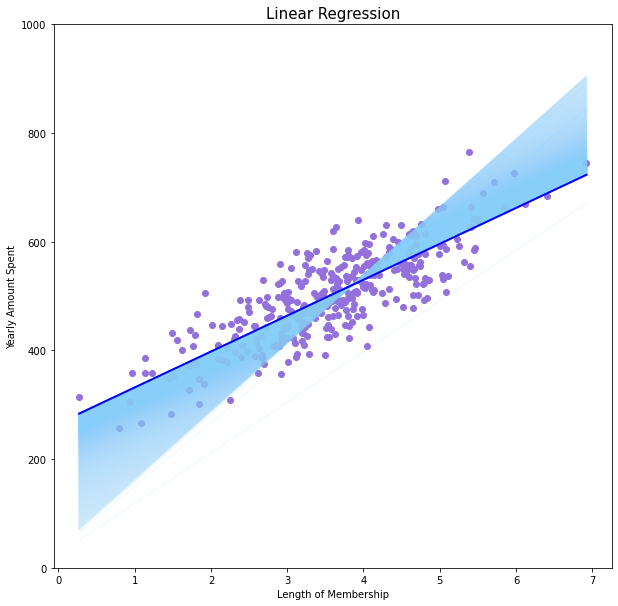

In [160]:
plt.figure(figsize=(10,10))

#Fit the regression
final_theta0, final_theta1 = linear_regression(X_train,y_train,0.05,1000,results=False , graph=True)
Y_pred = hyp_func(final_theta0,final_theta1,X_train)

#Plot the line of regression
final, = plt.plot([min(X_train),max(X_train)],[min(Y_pred),max(Y_pred)], c='blue',linewidth=2,zorder=2, label ='Final Fit')

plt.ylim([0,1000])
plt.scatter(X_train,y_train,zorder=0,c='mediumpurple')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.title('Linear Regression', fontsize=15)
plt.show()

### 6.2 Visualizing Gradient Descent 

To get a better understanding of the Gradient Descent Process which is being used to find the values of $\theta_0$ and $\theta_1$ we can visualize it using a contour plot of the Cost Function. 

In [242]:
from itertools import product

def find_cost(t0,t1,x,y): #Used to calculate the corresponding cost function for an array of theta0s and theta1s
    c = []
    for i in range(len(t0)):
        c.append(cost_func(t0[i],t1[i],x,y))
    return c

def plot_grad_descent(result_df,x,y,xlimits, ylimits,levels):
    dat0 = np.linspace(xlimits[0],xlimits[1],50) #Creates the theta0 values used for contour
    dat1 = np.linspace(ylimits[0],ylimits[1],50) #Creates the theta1 values used for contour
    
    #Creates a dataframe containing all possible combinations of theta0 and theta1 values
    plot_df = pd.DataFrame(product(dat0, dat1), columns=['Theta0', 'Theta1']) 
    #Calculates the cost of all possible combinations of theta0 and theta1
    dat2 = find_cost(plot_df.Theta0,plot_df.Theta1,x,y)
    plot_df['Cost'] = dat2# Adds costs to the dataframe

    #Creates a pivot table where the indices are the theta0 values, the columns are the theta1 values, 
    #and the values are the corresponding cost for a given theta0 and theta1 value 
    Cost_grid = plot_df.pivot_table(index='Theta0', columns='Theta1', values='Cost').T.values

    #Creates the grid of values necessary for plotting 
    Theta0_unique = np.sort(plot_df.Theta0.unique())
    Theta1_unique = np.sort(plot_df.Theta1.unique())
    Theta0_grid, Theta1_grid = np.meshgrid(Theta0_unique, Theta1_unique)

    plt.figure(figsize=(12,8))
    plt.contour(Theta0_grid, Theta1_grid, Cost_grid, levels=levels)
    plt.title('Visualizing Gradient Descent', fontsize=20)
    plt.colorbar(label='$J(\\theta_0, \\theta_1)$')
    plt.xlabel('$\\theta_0$')
    plt.ylabel('$\\theta_1$')

    plt.scatter(x='Theta0',y = 'Theta1' , data=result_df , c='lightskyblue' ,s =10 )
    plt.plot(result_df['Theta0'],result_df['Theta1'],c='lightskyblue')


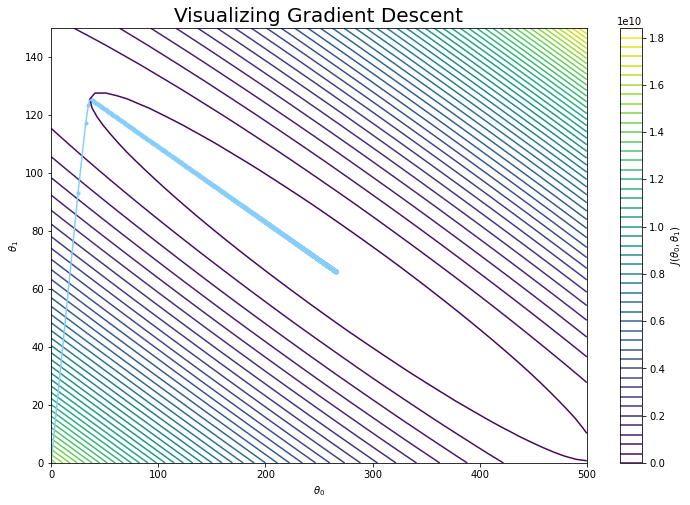

In [243]:
results = linear_regression(X_train,y_train,0.05,1000,results=True , graph=False)
plot_grad_descent(results, x= X_train, y =y_train, xlimits=(0,500), ylimits=[0,150], levels = 50)

### 6.2 Exploring the effect of different learning rates on convergence 

Now that we have fit our linear regression model we can alter the parameters and see what effect this has on our model. First we will see which learning rates cause our cost function to converge the fastest.

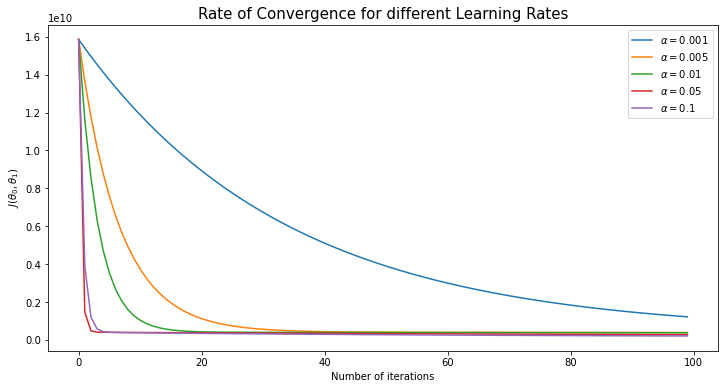

In [205]:
plt.figure(figsize=(12,6))
results = linear_regression(X_train,y_train,0.001,100,results=True)
results.Cost.plot( label = '$\\alpha=0.001$')
results = linear_regression(X_train,y_train,0.005,100,results=True)
results.Cost.plot( label = '$\\alpha=0.005$')
results = linear_regression(X_train,y_train,0.01,100,results=True)
results.Cost.plot(label = '$\\alpha=0.01$')
results = linear_regression(X_train,y_train,0.05,100,results=True)
results.Cost.plot(label = '$\\alpha=0.05$')
results = linear_regression(X_train,y_train,0.1,100,results=True)
results.Cost.plot(label = '$\\alpha=0.1$')
plt.title('Rate of Convergence for different Learning Rates', fontsize=15)
plt.xlabel('Number of iterations')
plt.ylabel('$J(\\theta_0, \\theta_1)$')
plt.legend()

plt.show()

We can clearly see that learning rates that are too small take much longer to converge. From the plot we can see that 0.05 would be a good learning rate to use. It is also important to explore what happens when our learning rate is too large:

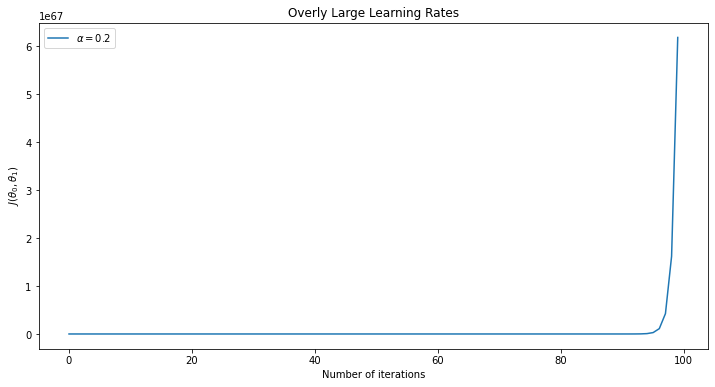

In [208]:
plt.figure(figsize=(12,6))

results = linear_regression(X_train,y_train,0.2,100,results=True)
results.Cost.plot(label = '$\\alpha=0.2$')

plt.title('Overly Large Learning Rates')
plt.xlabel('Number of iterations')
plt.ylabel('$J(\\theta_0, \\theta_1)$')
plt.legend()

As we can see, as soon as the learning rate is too large, the value of our cost function begins to diverge as opposed to converging as it did with smaller learning rates.

## 7. Improved Learning

With our original model built we can now implement varaious improved learning techniques in an attempt to optimize our model.

### 7.2 Feature Scaling 

The first of these improved learning techniques we can implement is feature scaling. We are only using one feature ('Length of Membership') to try and predict our target varaible ('Yearly Amount Spent') so instead of scaling different input feautres we can scale both our input and output features to create the same effect.

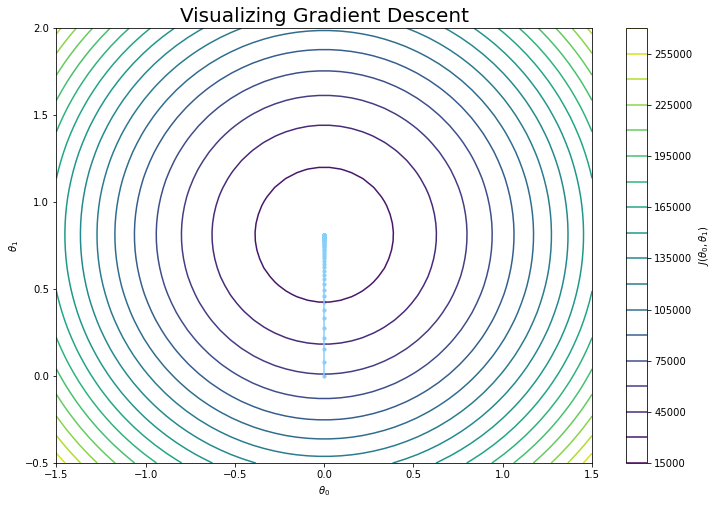

In [268]:
scaled_X_train = (X_train-X_train.mean())/X_train.std()
scaled_y_train = (y_train-y_train.mean())/y_train.std()

scaled_results = linear_regression(scaled_X_train,scaled_y_train,0.1,1000,results=True , graph=False)
plot_grad_descent(scaled_results, x= scaled_X_train, y = scaled_y_train,xlimits=[-1.5,1.5], ylimits=[-0.5,2], levels=20)

(0.0, 1000000000.0)

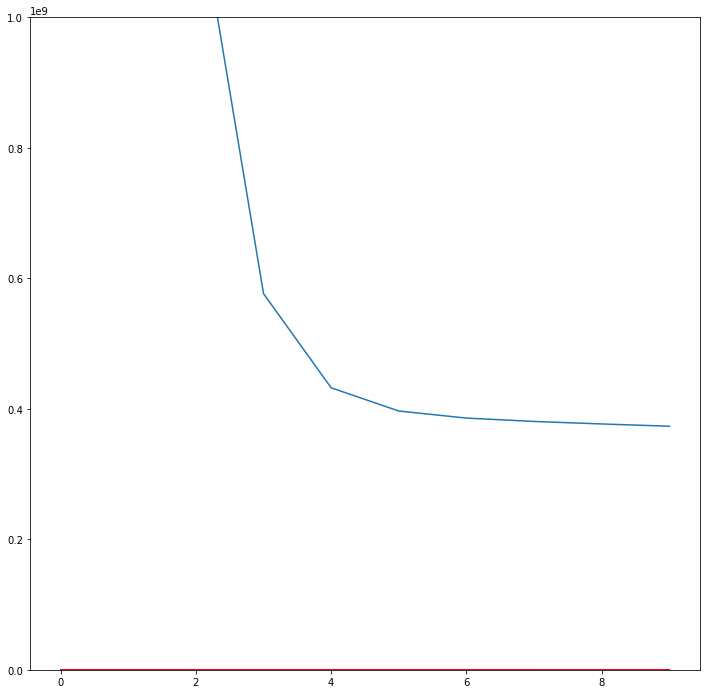

In [281]:
plt.figure(figsize=(12,12))


res1 = linear_regression(scaled_X_train,scaled_y_train,0.1,10,results=True , graph=False)
res2 = linear_regression(X_train,y_train,0.1,10,results=True , graph=False)

plt.plot(res1.Iter,res1.Cost,c='red')
plt.plot(res2.Iter,res2.Cost)
plt.ylim([0,1000000000])

# Visualizing Gradient descent

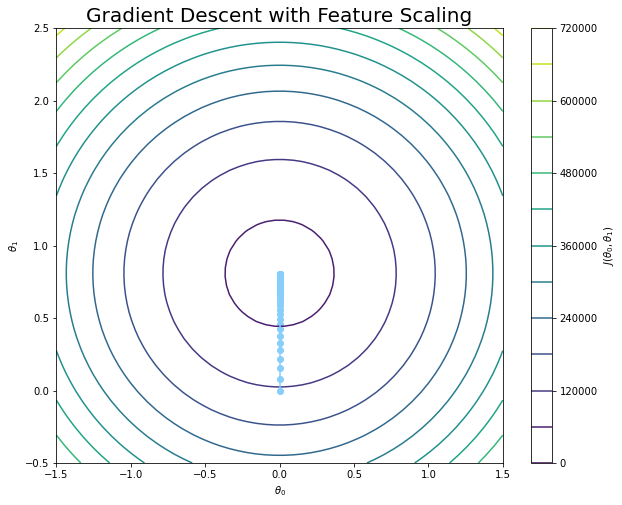

In [262]:

scaled_X = (X-X.mean())/(X.std())
scaled_Y = (Y-Y.mean())/(Y.std())

def find_cost_scaled(d0,d1):
    c = []
    for i in range(len(d0)):
        c.append(cost_func(d0[i],d1[i],scaled_X,scaled_Y))
    return c



final_theta0, final_theta1 = linear_regression(scaled_X,scaled_Y,0.1,50,results=False,graph=False)
results = linear_regression(scaled_X,scaled_Y,0.1,50,results=True) #CHECK HOW WE COULD CHANGE THE ITERATIONS TO 100

Y_pred = hyp_func(final_theta0,final_theta1,scaled_X)
#plt.plot([min(scaled_X),max(scaled_Y)],[min(Y_pred),max(Y_pred)], c='deepskyblue',linewidth=5,zorder=2)


dat0 = np.linspace(-1.5,1.5,50)#X-axis
dat1 = np.linspace(-0.5,2.5,50)#Yaxis

plot_df = pd.DataFrame(product(dat0, dat1), columns=['Theta0', 'Theta1'])
dat2 = find_cost_scaled(plot_df.Theta0,plot_df.Theta1)
plot_df['Cost'] = dat2


Cost_grid = plot_df.pivot_table(index='Theta0', columns='Theta1', values='Cost').T.values

Theta0_unique = np.sort(plot_df.Theta0.unique())
Theta1_unique = np.sort(plot_df.Theta1.unique())
Theta0_grid, Theta1_grid = np.meshgrid(Theta0_unique, Theta1_unique)

plt.figure(figsize=(10,8))
plt.contour(Theta0_grid, Theta1_grid, Cost_grid, levels=10)
plt.title('Gradient Descent with Feature Scaling', fontsize=20)
plt.colorbar(label='$J(\\theta_0, \\theta_1)$')
plt.xlabel('$\\theta_0$')
plt.ylabel('$\\theta_1$')

plt.scatter(x='Theta0',y = 'Theta1' , data=results , c='lightskyblue' )
plt.plot(results['Theta0'],results['Theta1'],c='lightskyblue')



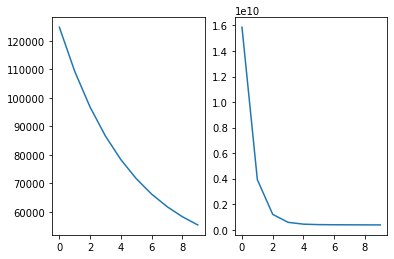

In [266]:
fig , (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
res1 = linear_regression(scaled_X,scaled_Y,0.1,10,results=True , graph=False)
res2 = linear_regression(X_train,y_train,0.1,10,results=True , graph=False)

ax1.plot(res1.Iter,res1.Cost)
ax2.plot(res2.Iter,res2.Cost)

# Regularized Linear Regression

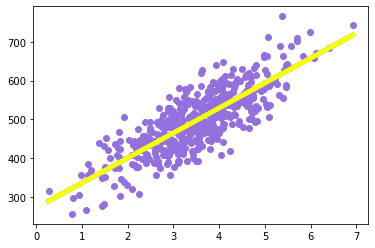

In [58]:
#fig, (ax1, ax2) = plt.subplots(nrows =1, ncols = 2,figsize=(15,6))

#Fit the normal regression
final_theta0, final_theta1 = linear_regression(X,Y,0.1,1000,results=False , graph=False)

Y_pred = hyp_func(final_theta0,final_theta1,X)
plt.plot([min(X),max(X)],[min(Y_pred),max(Y_pred)], c='deepskyblue',linewidth=5,zorder=2)
plt.scatter(X,Y,zorder=0,c='mediumpurple')

#Fit regularized Linear regression
reg_theta0, reg_theta1 = linear_regression(X,Y,0.1,1000,results=False , graph=False)

Y_pred = hyp_func(reg_theta0,reg_theta1,X)
plt.plot([min(X),max(X)],[min(Y_pred),max(Y_pred)], c='yellow',linewidth=5,zorder=2)
#ax2.scatter(X,Y,zorder=0,c='mediumpurple')


#m, b = np.polyfit(X, Y, 1)
#plt.plot(X, m*X + b, c='blue', alpha=0.5)



In [ ]:
#Fit our Mdel 
results = linear_regression(X,Y,0.1,1000,results=True)
#plt.scatter(x='Theta0',y = 'Theta1' , data=results , c='black')


#plt.plot(X, m*X + c, c='pink', alpha=0.5)
#plt.figure(figsize=(12,12))

# Other random crap

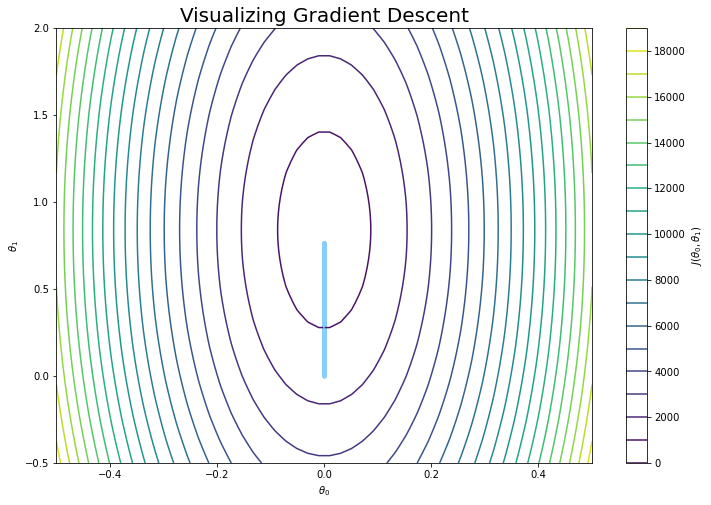

In [245]:
scaled_X_train = (X_train-X_train.mean())/(max(X_train)-min(X_train))
scaled_y_train = (y_train-y_train.mean())/(max(y_train)-min(y_train))

scaled_results = linear_regression(scaled_X_train,scaled_y_train,0.1,1000,results=True , graph=False)
plot_grad_descent(scaled_results, x= scaled_X_train, y = scaled_y_train,xlimits=[-0.5,0.5], ylimits=[-0.5,2], levels=20)

Theta0    Theta1          Cost  Iter
0      0.000000  0.000000  3.194910e+10     0
1      0.499314  0.009620  3.188677e+10     1
2      0.998129  0.019239  3.182458e+10     2
3      1.496445  0.028858  3.176251e+10     3
4      1.994262  0.038477  3.170056e+10     4
..          ...       ...           ...   ...
995  314.797813  9.465261  5.018050e+09   995
996  314.982329  9.474667  5.009521e+09   996
997  315.166661  9.484073  5.001008e+09   997
998  315.350808  9.493480  4.992513e+09   998
999  315.534772  9.502886  4.984034e+09   999

[1000 rows x 4 columns]

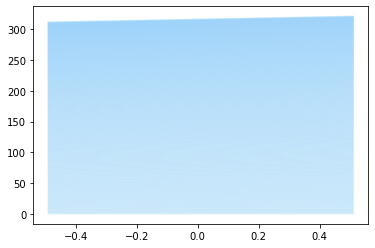

In [74]:
#final_theta0, final_theta1 = linear_regression(X,Y,0.05,1000,results=False)
#results = linear_regression(X,Y,0.05,1000,results=True)

#plot_grad_descent(results)

scaled_X = (X-X.mean())/(max(X)-min(X))

final_theta0, final_theta1 = linear_regression(scaled_X,Y,0.001,1000,results=False)
results = linear_regression(scaled_X,Y,0.001,1000,results=True)
#plot_grad_descent(results)
results

# Stochastic Approach

In [75]:
shuffled_data = data.sample(frac =1).reset_index(drop=True)
shuffled_data

memb_len    yr_spend
0    3.919302  519.340989
1    4.639320  616.851523
2    4.595523  556.186369
3    3.612239  502.092528
4    2.562819  444.545550
..        ...         ...
495  0.801516  298.762008
496  1.785174  427.356531
497  3.107469  413.295999
498  3.230974  557.529274
499  4.087837  554.900783

[500 rows x 2 columns]

In [76]:
alpha = 0.05
theta0 = 0
theta1 = 0 
iterations = 100

stoc_theta0 = []
stoc_theta1 = [] 
stoc_costs = [] 

for j in range(iterations):

    
    for i in range(len(shuffled_data)):
        temp_x = shuffled_data.iloc[i,0]
        temp_y = shuffled_data.iloc[i,1]
        stoc_theta0.append(theta0)
        stoc_theta1.append(theta1)
        stoc_costs = cost_func(theta0,theta1)
        
        pred_y = theta0 + theta1*temp_x

        temp_theta0 = theta0 - alpha*(pred_y - temp_y)
        temp_theta1 = theta1 - alpha*((pred_y - temp_y)*temp_x)
        theta0 = temp_theta0
        theta1 = temp_theta1


stoc_df = pd.DataFrame()
stoc_df['Stoc_Theta_0'] = stoc_theta0
stoc_df['Stoc_Theta_1'] = stoc_theta1 
stoc_df['Stoc_Cost'] =stoc_costs



In [77]:
stoc_df


Stoc_Theta_0  Stoc_Theta_1     Stoc_Cost
0          0.000000      0.000000  4.485926e+08
1         25.967049    101.772717  4.485926e+08
2         31.903461    129.313634  4.485926e+08
3         28.404420    113.233708  4.485926e+08
4         31.637463    124.912235  4.485926e+08
...             ...           ...           ...
49995    270.602721     65.917365  4.485926e+08
49996    269.368995     64.928514  4.485926e+08
49997    271.472937     68.684417  4.485926e+08
49998    267.892356     57.557875  4.485926e+08
49999    273.075803     74.305455  4.485926e+08

[50000 rows x 3 columns]

## Mini-batch

I'm not sure if this is actually working 

In [78]:
iterations = 100

mbatch_theta0= 0
mbatch_theta1= 0

mbatch_theta0_list= []
mbatch_theta1_list = [] 
mbatch_costs = [] 


for i in range(iterations):
    for x in range(50):
        mbatch_x = shuffled_data.iloc[x*10:x*10+10].iloc[:,0]
        mbatch_y = shuffled_data.iloc[x*10:x*10+10].iloc[:,1]
        mbatch_theta0_list.append(mbatch_theta0)
        mbatch_theta1_list.append(mbatch_theta1)
        mbatch_costs = cost_func(mbatch_theta0,mbatch_theta1)
        mbatch_theta0,mbatch_theta1 = update_vals(curr_theta0=mbatch_theta0,curr_theta1= mbatch_theta1,x= mbatch_x, y= mbatch_y, learning_rate=0.05)


mbatch_df = pd.DataFrame()
mbatch_df['Mini_Batch_Theta_0'] = mbatch_theta0_list
mbatch_df['Mini_Batch_Theta_1'] = mbatch_theta1_list

mbatch_df

Mini_Batch_Theta_0  Mini_Batch_Theta_1
0               0.000000            0.000000
1              26.478556          105.505096
2              32.731038          126.211706
3              33.985038          127.034878
4              34.169324          125.014804
...                  ...                 ...
4995          270.645319           68.989670
4996          268.905402           61.619021
4997          270.204082           67.082697
4998          270.558976           67.882983
4999          270.640975           67.250525

[5000 rows x 2 columns]

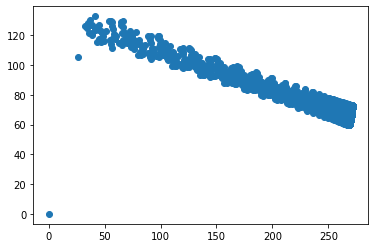

In [79]:
plt.scatter(x = mbatch_df['Mini_Batch_Theta_0'], y =mbatch_df['Mini_Batch_Theta_1'])

In [80]:
mbatch_df = pd.DataFrame()
mbatch_df['Mini_Batch_Theta_0'] = mbatch_theta0s
mbatch_df['Mini_Batch_Theta_1'] = mbatch_theta1s

NameError: name 'mbatch_theta0s' is not defined

In [ ]:
mbatch_theta0s = [] 
mbatch_theta1s = [] 

for x in range(50):
    mbatch_x = shuffled_data.iloc[x*10:x*10+10].iloc[:,0]
    mbatch_y = shuffled_data.iloc[x*10:x*10+10].iloc[:,1]
    mbatch_theta0s.append(linear_regression(mbatch_x,mbatch_y,0.05,1000)[0])
    mbatch_theta1s.append(linear_regression(mbatch_x,mbatch_y,0.05,1000)[1])

In [ ]:
mbatch_df

In [ ]:
plt.scatter(x = mbatch_df['Mini_Batch_Theta_0'], y =mbatch_df['Mini_Batch_Theta_1'])

In [ ]:
plt.figure(figsize=(10,10))



plt.scatter(x='Stoc_Theta_0',y = 'Stoc_Theta_1' , data=stoc_df, c ='red', zorder = 0 )
plt.plot(stoc_df['Stoc_Theta_0'],stoc_df['Stoc_Theta_1'], c='red', zorder=0, label= 'Stochastic')

plt.scatter(x = mbatch_df['Mini_Batch_Theta_0'], y =mbatch_df['Mini_Batch_Theta_1'], zorder=1)
plt.plot(mbatch_df['Mini_Batch_Theta_0'], mbatch_df['Mini_Batch_Theta_1'],zorder = 1, label='Mini-batch')

plt.scatter(x='Theta0',y = 'Theta1' , data=results , c='blue' , zorder =2)
plt.plot(results['Theta0'],results['Theta1'],c='blue', zorder = 2 , label = 'Batch')
plt.legend()



In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Theta0',y = 'Theta1' , data=results,hue='Cost')

In [ ]:
plt.figure(figsize=(1,1))
sns.kdeplot(x='Theta0',y = 'Theta1' , data=results)

In [ ]:
results

## Trying to use the stochastic approach

In [ ]:
from itertools import product

def find_cost(d0,d1):
    c = []
    for i in range(len(d0)):
        c.append(cost_func(d0[i],d1[i],X,Y))
    return c

dat0 = np.linspace(0,500,50)
dat1 = np.linspace(0,150,50)

plot_df = pd.DataFrame(product(dat0, dat1), columns=['Theta0', 'Theta1'])

dat2 = find_cost(plot_df.Theta0,plot_df.Theta1)

plot_df['Cost'] = dat2


Cost_grid = plot_df.pivot_table(index='Theta0', columns='Theta1', values='Cost').T.values

Theta0_unique = np.sort(plot_df.Theta0.unique())
Theta1_unique = np.sort(plot_df.Theta1.unique())
Theta0_grid, Theta1_grid = np.meshgrid(Theta0_unique, Theta1_unique)

plt.figure(figsize=(12,6))
plt.contour(Theta0_grid, Theta1_grid, Cost_grid, levels=50)
plt.colorbar(label='$J(\\theta_0, \\theta_1)$')
plt.xlabel('$\\theta_0$')
plt.ylabel('$\\theta_1$')



plt.scatter(x='Stoc_Theta_0',y = 'Stoc_Theta_1' , data=stoc_df, c ='red', zorder = 0 )
plt.plot(stoc_df['Stoc_Theta_0'],stoc_df['Stoc_Theta_1'], c='red', zorder=0, label= 'Stochastic')

plt.scatter(x = mbatch_df['Mini_Batch_Theta_0'], y =mbatch_df['Mini_Batch_Theta_1'], zorder=1)
plt.plot(mbatch_df['Mini_Batch_Theta_0'], mbatch_df['Mini_Batch_Theta_1'],zorder = 1, label='Mini-batch')

plt.scatter(x='Theta0',y = 'Theta1' , data=results , c='blue' , zorder =2)
plt.plot(results['Theta0'],results['Theta1'],c='blue', zorder = 2 , label = 'Batch')
plt.legend()




#sns.scatterplot(x= 'Theta0', y='Theta1', data = plot_df, hue='Cost')
#sns.scatterplot(x='Theta0',y = 'Theta1' , data=results,hue='Cost')

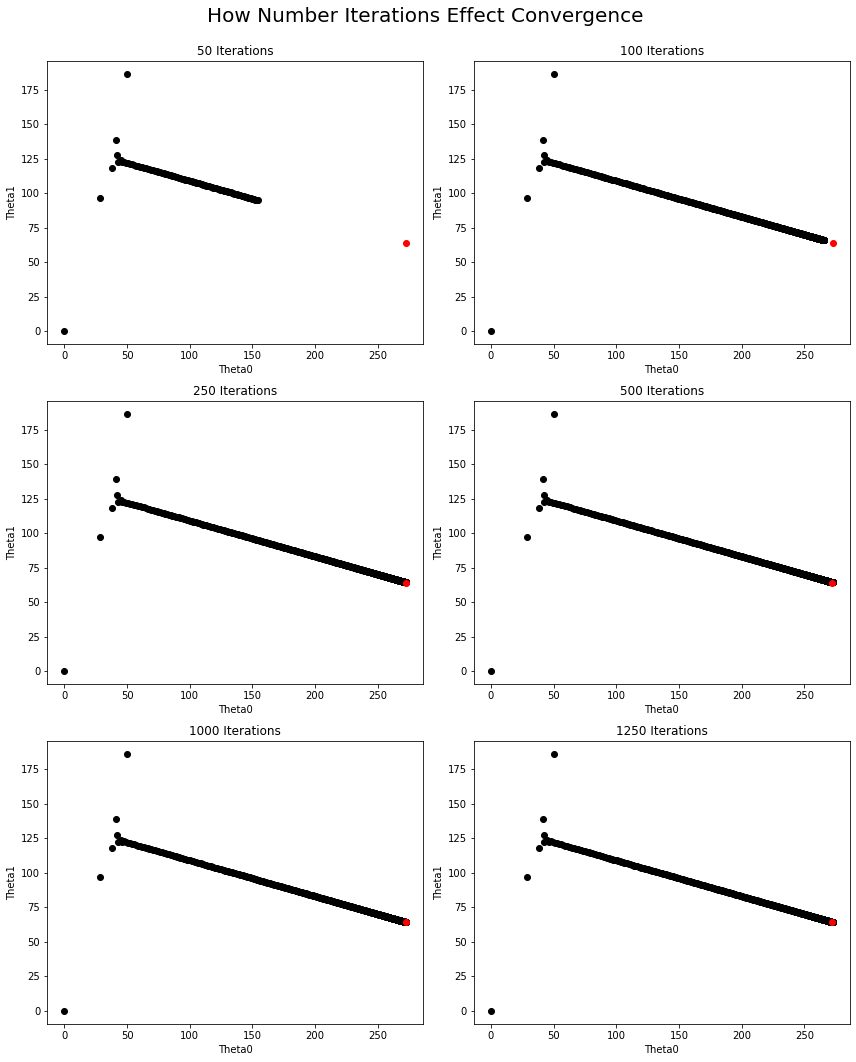

In [209]:
#Fit Numpy Least Squares Model
base_theta1,base_theta0 = np.polyfit(X_train, y_train, 1)
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows =3, ncols = 2,figsize=(12,15))

fig.suptitle('How Number Iterations Effect Convergence ', fontsize=20)


ax1.scatter(x='Theta0',y = 'Theta1' , data=linear_regression(X_train, y_train,0.05,100,results=True), c='black')
ax1.scatter(c,m,c='red')
ax1.set_xlabel('Theta0')
ax1.set_ylabel('Theta1')
ax1.set_title('50 Iterations')


ax2.scatter(x='Theta0',y = 'Theta1' , data=linear_regression(X_train, y_train,0.05,500,results=True), c='black')
ax2.scatter(c,m,c='red')
ax2.set_xlabel('Theta0')
ax2.set_ylabel('Theta1')
ax2.set_title('100 Iterations')

ax3.scatter(x='Theta0',y = 'Theta1' , data=linear_regression(X_train, y_train,0.05,1000,results=True) , c='black')
ax3.scatter(c,m,c='red')
ax3.set_xlabel('Theta0')
ax3.set_ylabel('Theta1')
ax3.set_title('250 Iterations')

ax4.scatter(x='Theta0',y = 'Theta1' , data=linear_regression(X_train, y_train,0.05,1500,results=True), c='black')
ax4.scatter(c,m,c='red')
ax4.set_xlabel('Theta0')
ax4.set_ylabel('Theta1')
ax4.set_title('500 Iterations')

ax5.scatter(x='Theta0',y = 'Theta1' , data=linear_regression(X_train, y_train,0.05,2000,results=True), c='black')
ax5.scatter(c,m,c='red')
ax5.set_xlabel('Theta0')
ax5.set_ylabel('Theta1')
ax5.set_title('1000 Iterations')

ax6.scatter(x='Theta0',y = 'Theta1' , data=linear_regression(X_train, y_train,0.05,1250,results=True), c='black')
ax6.scatter(c,m,c='red')
ax6.set_xlabel('Theta0')
ax6.set_ylabel('Theta1')
ax6.set_title('1250 Iterations')


fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()